In [1]:
import numpy as np
import pandas as pd

In [2]:
orig_df=pd.read_csv("Churn_Modelling.csv")
orig_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Removing unwanted columns "RowNumber","CustomerId","Surname".

In [3]:
df=orig_df.drop(columns=["RowNumber","CustomerId","Surname"])

In [4]:
print("Lets get some data info: ")
print(df.info())

Lets get some data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


As here we have 2 categorical columns as "Geography","Gender".

Also remaining 9 numerical columns. So in total 11 columns

In [5]:
print("Some statistical observation from data: ")
df.describe()

Some statistical observation from data: 


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Checking for missing values in data

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values present in data

In [7]:
df.duplicated().sum()

np.int64(0)

# EDA

Checking for distributions for variables

Let's go for numerical columns first.

In [8]:
df_num_col=[]
for i in df.columns:
    if (df[i].dtype=="int64") | (df[i].dtype=="float64"):
        df_num_col.append(i)

df_num_col


['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [9]:
df_cat_col=df.columns.drop(df_num_col)
df_cat_col

Index(['Geography', 'Gender'], dtype='object')

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Let's observe ditributions of different variables.

Removing binary variables as there count plot will be plot latter

In [11]:
df_bin_col=["HasCrCard","IsActiveMember","Exited"]
df_num_col=[items for items in df_num_col if items not in df_bin_col]
df_num_col
df_bin_col.remove("Exited")
df_cat_col=list(df_cat_col)+df_bin_col


In [12]:
df_bin_col

['HasCrCard', 'IsActiveMember']

# Distributions for numerical columns

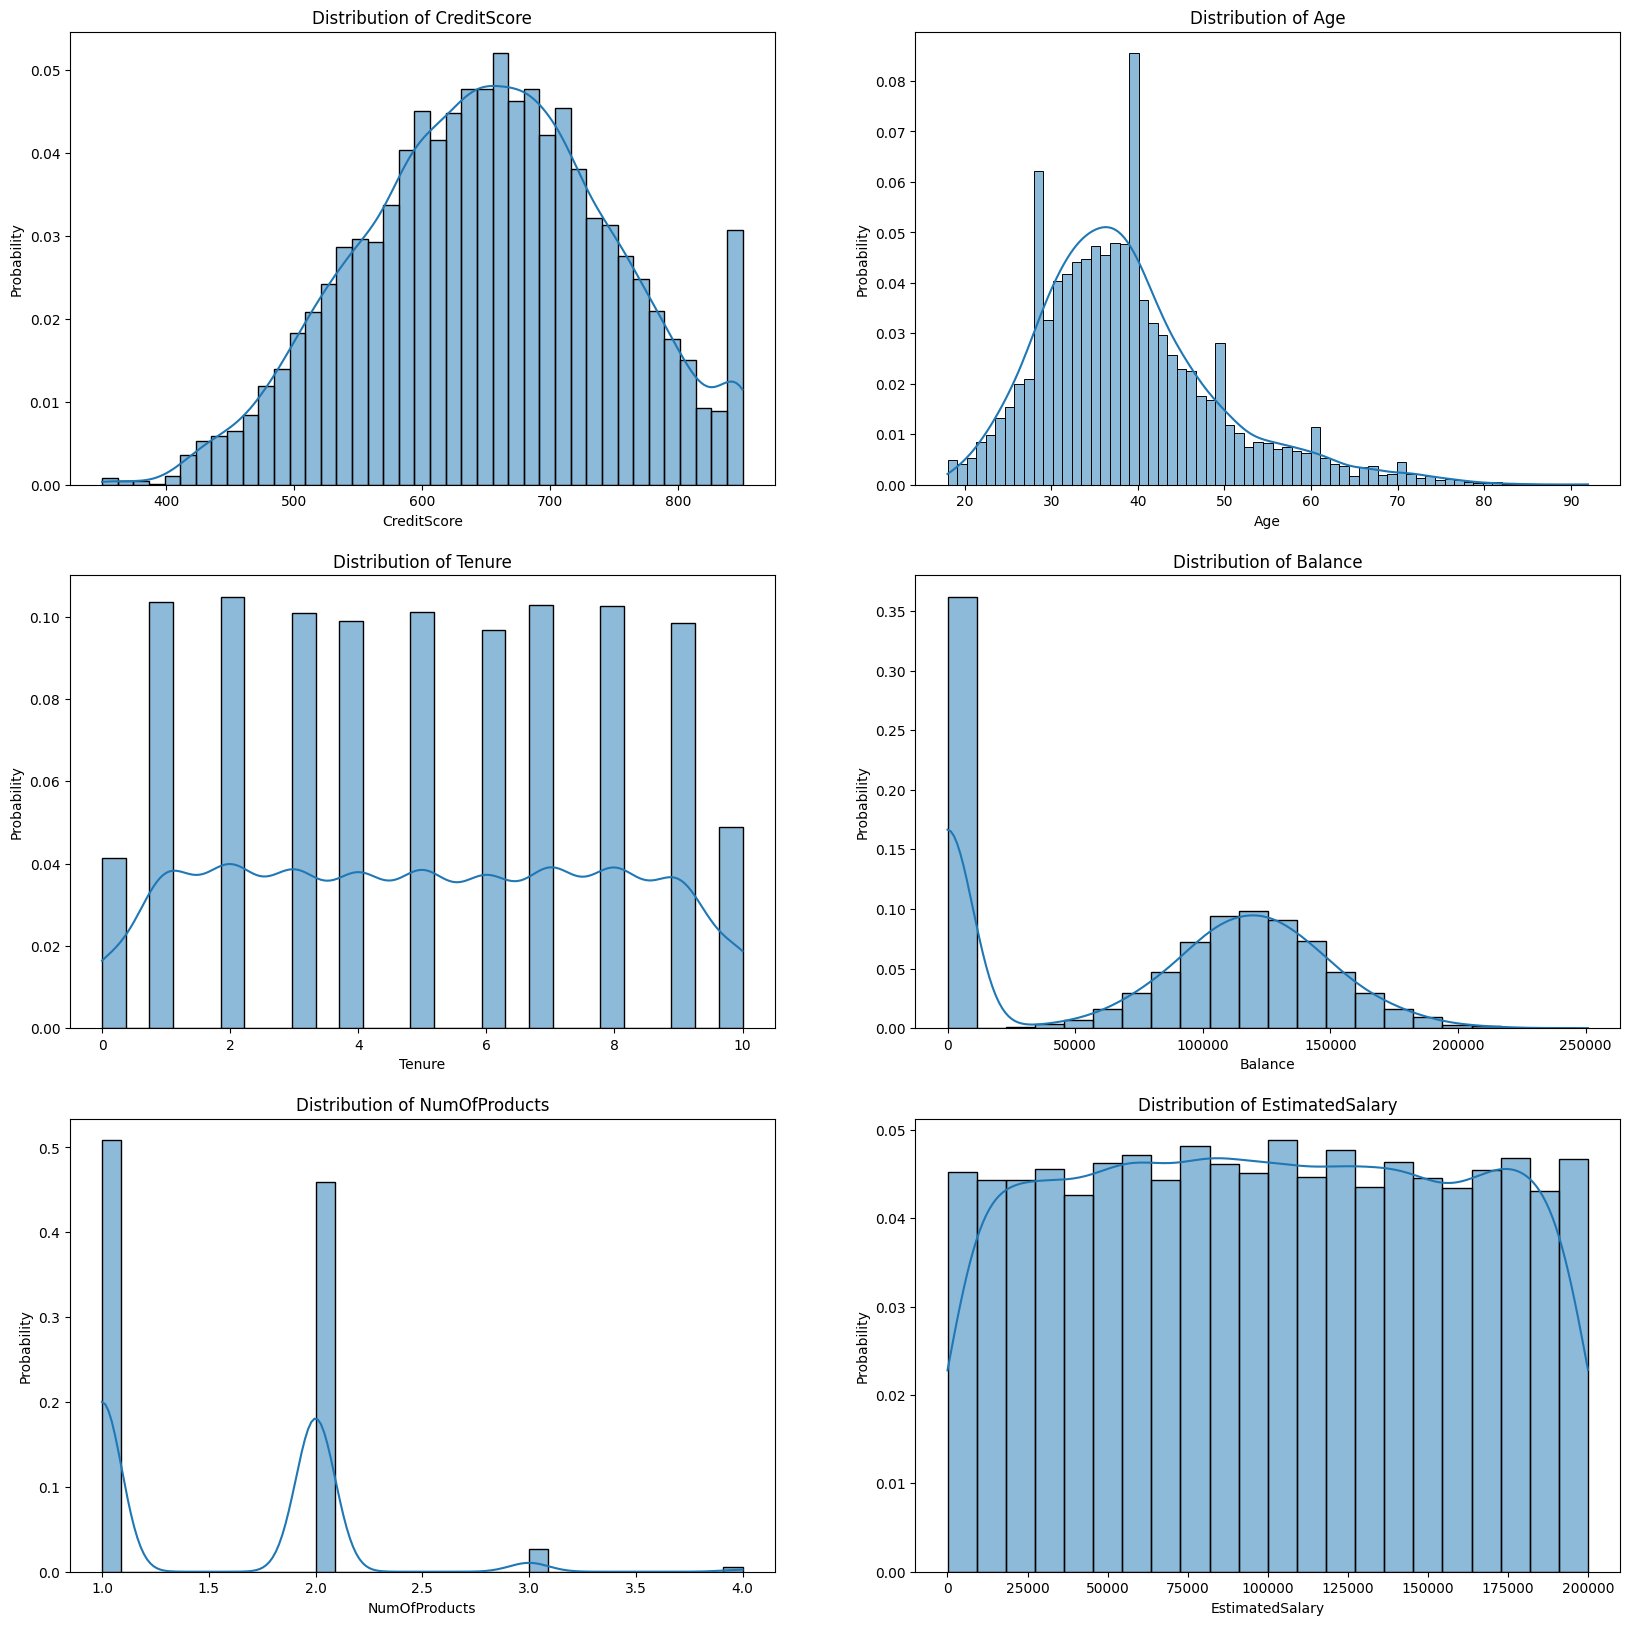

In [13]:
fig,ax=plt.subplots(3,2,figsize=(20,20))
ax=ax.ravel()
for i,col in enumerate(df_num_col):
    sns.histplot(df[col],ax=ax[i],stat="probability",kde=True)
    ax[i].set_title(f"Distribution of {col}")
    



Obervarions:

1. CreditScore: Distribution of Credit Score is mostly normal slight left skewed implies maximum customers have credit score between 600 - 700.

2. Age        : Distibution of age is little right skewed implying mostly customers from young age and less customer are from older group.

3. Tenure     : Distribution of Tenure seems to be uniform kind implying number of customers been in bank is almost same for years 1-10.

4. Balance    : Distribution of balance is noraml but its seems bimodal normal as it has a peak at 0 also, this peak may suggest inactive users.

5. NumOfProducts: As from distribution of NumProducts, it seems that most of the peoples have onr=e or two products while very less have 3 or 4 products.

6. EstimatedSalary: Its distribution is also indicating uniform like behavior implies salaries are evenly spread across all income levels.

After obseving this it seems like NumOfProduct should consider like categorical variable.

In [14]:
df_cat_col.append("NumOfProducts")
df_num_col.remove("NumOfProducts")

# Correlation between numerical variables

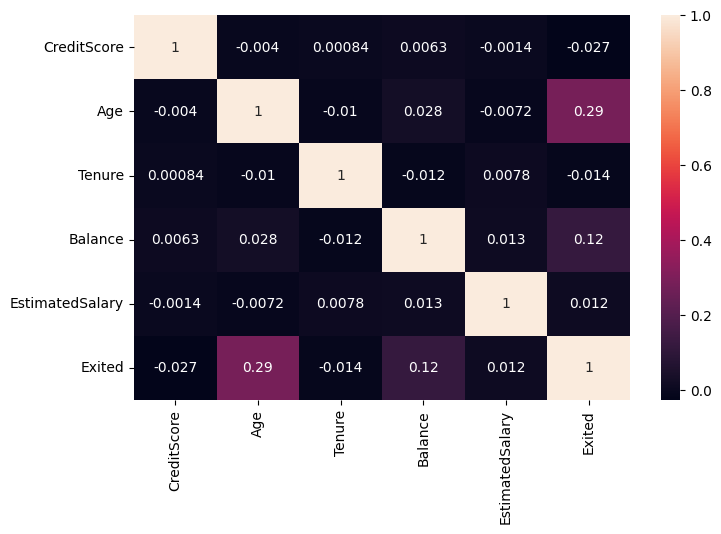

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(data=df[df_num_col+["Exited"]].corr(),annot=True)
plt.show()

Observation based on heatmap:

1. Age and Exited are positively correlated with corr. coeficient 0.29 implies older customer are more likely to churn.

2. Not much affectable correlation in between the variables.

# Count plots for categorical variables:

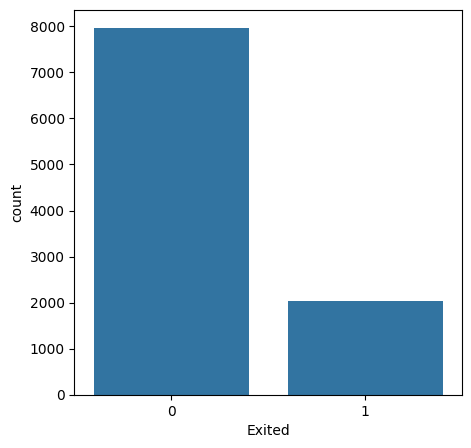

In [16]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x=df["Exited"])
plt.show()


So, around 8000 customers churned out off 10000

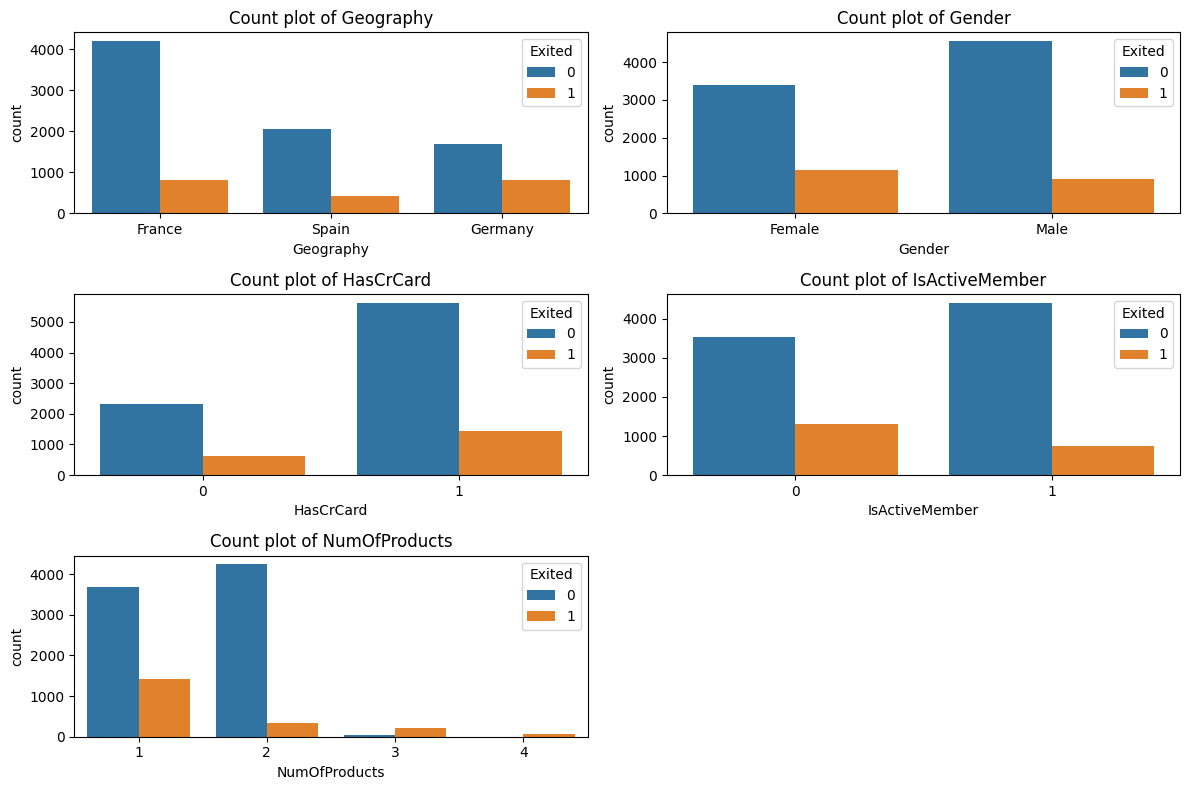

In [17]:
fig,ax= plt.subplots(3,2,figsize=(12 ,8))
ax=ax.flatten()
for i, col in enumerate(df_cat_col):
    sns.countplot(data=df,x=col,ax=ax[i],hue="Exited",)
    ax[i].set_title(f"Count plot of {col}")
ax[5].set_visible(False)
plt.tight_layout()
plt.show()
    

In [18]:
prop_by_geo=df["Exited"].groupby(df["Geography"]).agg(["count","sum"])
print("1. Percentage of churn  by : ",prop_by_geo["sum"]*100/prop_by_geo["count"])
prop_by_gen=df["Exited"].groupby(df["Gender"]).agg(["count","sum"])
print("2. Percentage of churn by : ",prop_by_gen["sum"]*100/prop_by_gen["count"])
prop_by_crd=df["Exited"].groupby(df["HasCrCard"]).agg(["count","sum"])
print("3. Percentage of churn by :",prop_by_crd["sum"]*100/prop_by_crd["count"])
prop_by_activ=df["Exited"].groupby(df["IsActiveMember"]).agg(["count","sum"])
print("4. Percentage of churn by :",prop_by_activ["sum"]*100/prop_by_activ["count"])
prop_by_numProd=df["Exited"].groupby(df["NumOfProducts"]).agg(["count","sum"])
print("5. Percentage of churn by :",prop_by_numProd["sum"]*100/prop_by_numProd["count"])


1. Percentage of churn  by :  Geography
France     16.154767
Germany    32.443204
Spain      16.673395
dtype: float64
2. Percentage of churn by :  Gender
Female    25.071539
Male      16.455928
dtype: float64
3. Percentage of churn by : HasCrCard
0    20.814941
1    20.184266
dtype: float64
4. Percentage of churn by : IsActiveMember
0    26.850897
1    14.269074
dtype: float64
5. Percentage of churn by : NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
dtype: float64


Obsevations based on countplots:

1. Geography: Germany(32.44%) has higher churn rate than France(16.15%) and Spain(16.67%).

2. Gender: Males have higher lower churn rate (16.45) than that of females(25.07).

3. Credit Card: Customers with credit card have little lower churn rate(20.81) as compared to  that of without card (20.81).

4. Active Member: Inactive members are more likely to churn with churn rate 26.85 than active members(14.26).

5. NumOfProducts: Customers having 2 products has least churn rate(7.58), while with 4 products are almost all churned(100%).

# Outlier detection

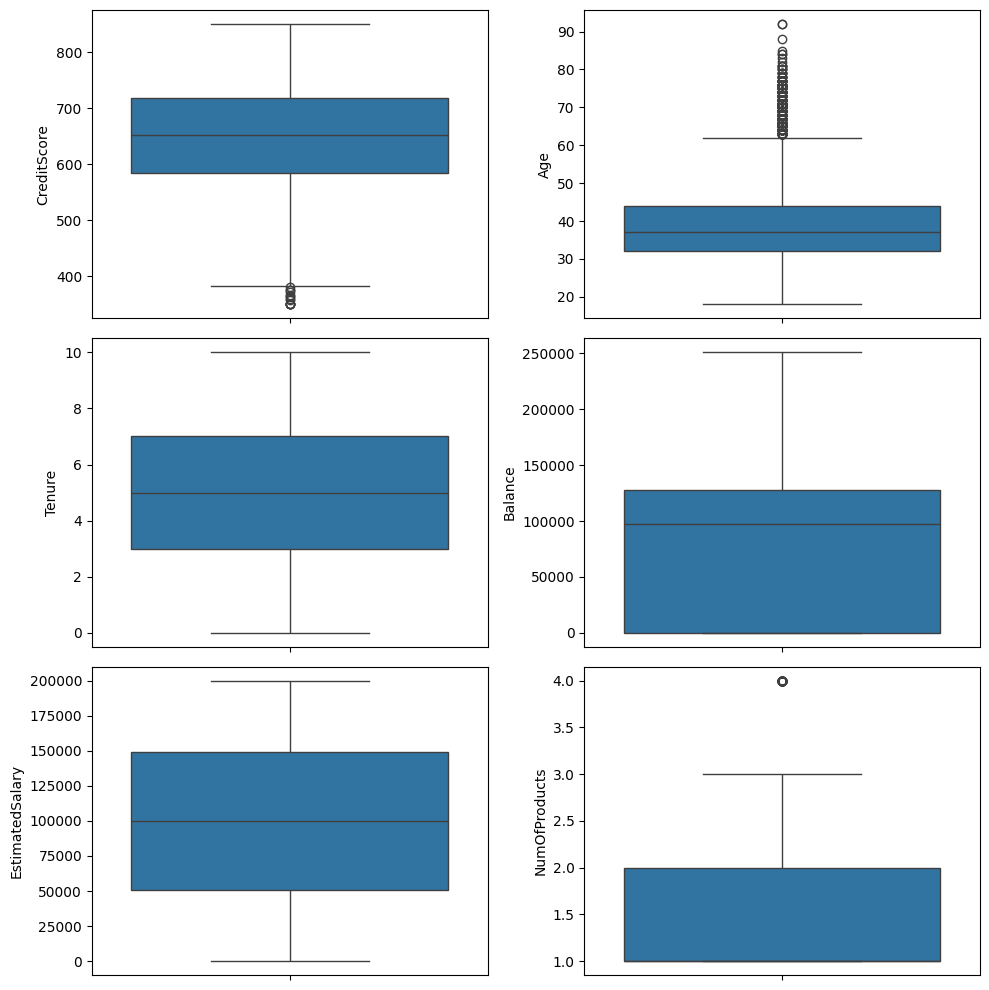

In [19]:
fig,ax=plt.subplots(3,2,figsize=(10,10))
ax=ax.ravel()
for i,col in enumerate(df_num_col+["NumOfProducts"]):
    sns.boxplot(df[col],ax=ax[i])
plt.tight_layout()

As here we can see CreditScore have some outliers and Age have very much outliers.

But as this both columns observations are important to us also outliers are not much extreme so what we do is we use Roboust scaling for reducing the influence of this outliers.

# Train test spliting

For testing the performance of our model we need to split our data into two parts, say 80% of data will be used for training the model and remaining 20% will be used for testing the performance of model.

In [20]:
x=df.drop(columns=["Exited"])
y=df["Exited"]


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Data Preprocessing

Our data looks like,

In [22]:

x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8856,774,France,Female,26,5,0.00,2,1,1,64716.08
1545,602,Germany,Female,42,6,158414.85,1,1,1,131886.46
8136,716,France,Female,38,1,0.00,2,1,1,99661.46
7768,601,Spain,Female,20,9,122446.61,2,1,0,86791.90
7782,585,France,Male,54,8,87105.32,1,1,1,55346.14


We don't have missing values.

In [23]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [24]:
rob_scale=RobustScaler()
std_scale=StandardScaler()
ohe_encoder=OneHotEncoder(drop="first")

In [25]:
from sklearn.compose import ColumnTransformer

In [26]:
col_trf=ColumnTransformer([
   
    ("rob_scale",rob_scale,["CreditScore","Age"]),
    ("std_scale",std_scale,["Balance","EstimatedSalary"]),
    ("ohe",ohe_encoder,["Geography","Gender","NumOfProducts"])
      
],remainder="passthrough")

In [27]:
x_train_trf=col_trf.fit_transform(x_train)
x_test_trf=col_trf.transform(x_test)

# Multicollinearity
Let's now check if there is any multicollinearity.

In [28]:
x1=pd.DataFrame(x_train_trf)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
print(vif_data)

    feature       VIF
0         0  1.001359
1         1  1.059375
2         2  1.389983
3         3  1.001641
4         4  1.712814
5         5  1.403877
6         6  1.966332
7         7  2.052801
8         8  1.054204
9         9  1.014209
10       10  2.919019
11       11  2.631875
12       12  1.875838


As, all VIF values are less than 5 hence no multicollinearity.

# Model Selection

For selecting a appropriate model, lets start from simple model and find which is is performing better and then we will go for upgrading that model by hypertuning the parameters.

First we will be fitting the models that can handle the imbalanced datasets on their own using claass_weitht hyperparameter.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score,make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score ,precision_score,accuracy_score  ,roc_auc_score, precision_recall_curve,average_precision_score

In [30]:
f2_scorer=make_scorer(fbeta_score,beta=2,average="binary",pos_label=1)

1. Logistic Regression


In [ ]:
lor=LogisticRegression(class_weight="balanced",penalty="elasticnet",tol=0.0001,C=0.1,max_iter=1000,l1_ratio=0.4,solver="saga")

lor.fit(x_train_trf,y_train)
print("Classification report: \n",classification_report(y_test,lor.predict(x_test_trf)))

print("F2 score: ",fbeta_score(y_test,lor.predict(x_test_trf),beta=2))
print("Cross value F2 score: ",np.mean(cross_val_score(lor,x_train_trf,y_train,cv=5,scoring=f2_scorer)))
print("ROC score: ",roc_auc_score(y_test,lor.predict_proba(x_test_trf)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,lor.predict_proba(x_test_trf)[:,1]))

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1617
           1       0.44      0.75      0.55       383

    accuracy                           0.77      2000
   macro avg       0.68      0.76      0.70      2000
weighted avg       0.83      0.77      0.79      2000

F2 score:  0.6555504796710827
Cross value F2 score:  0.6632886256721104
ROC score:  0.8216178947249443
Average Precision score:  0.5721539226233306


Checking for Linearity assumption for Logistic Regression.


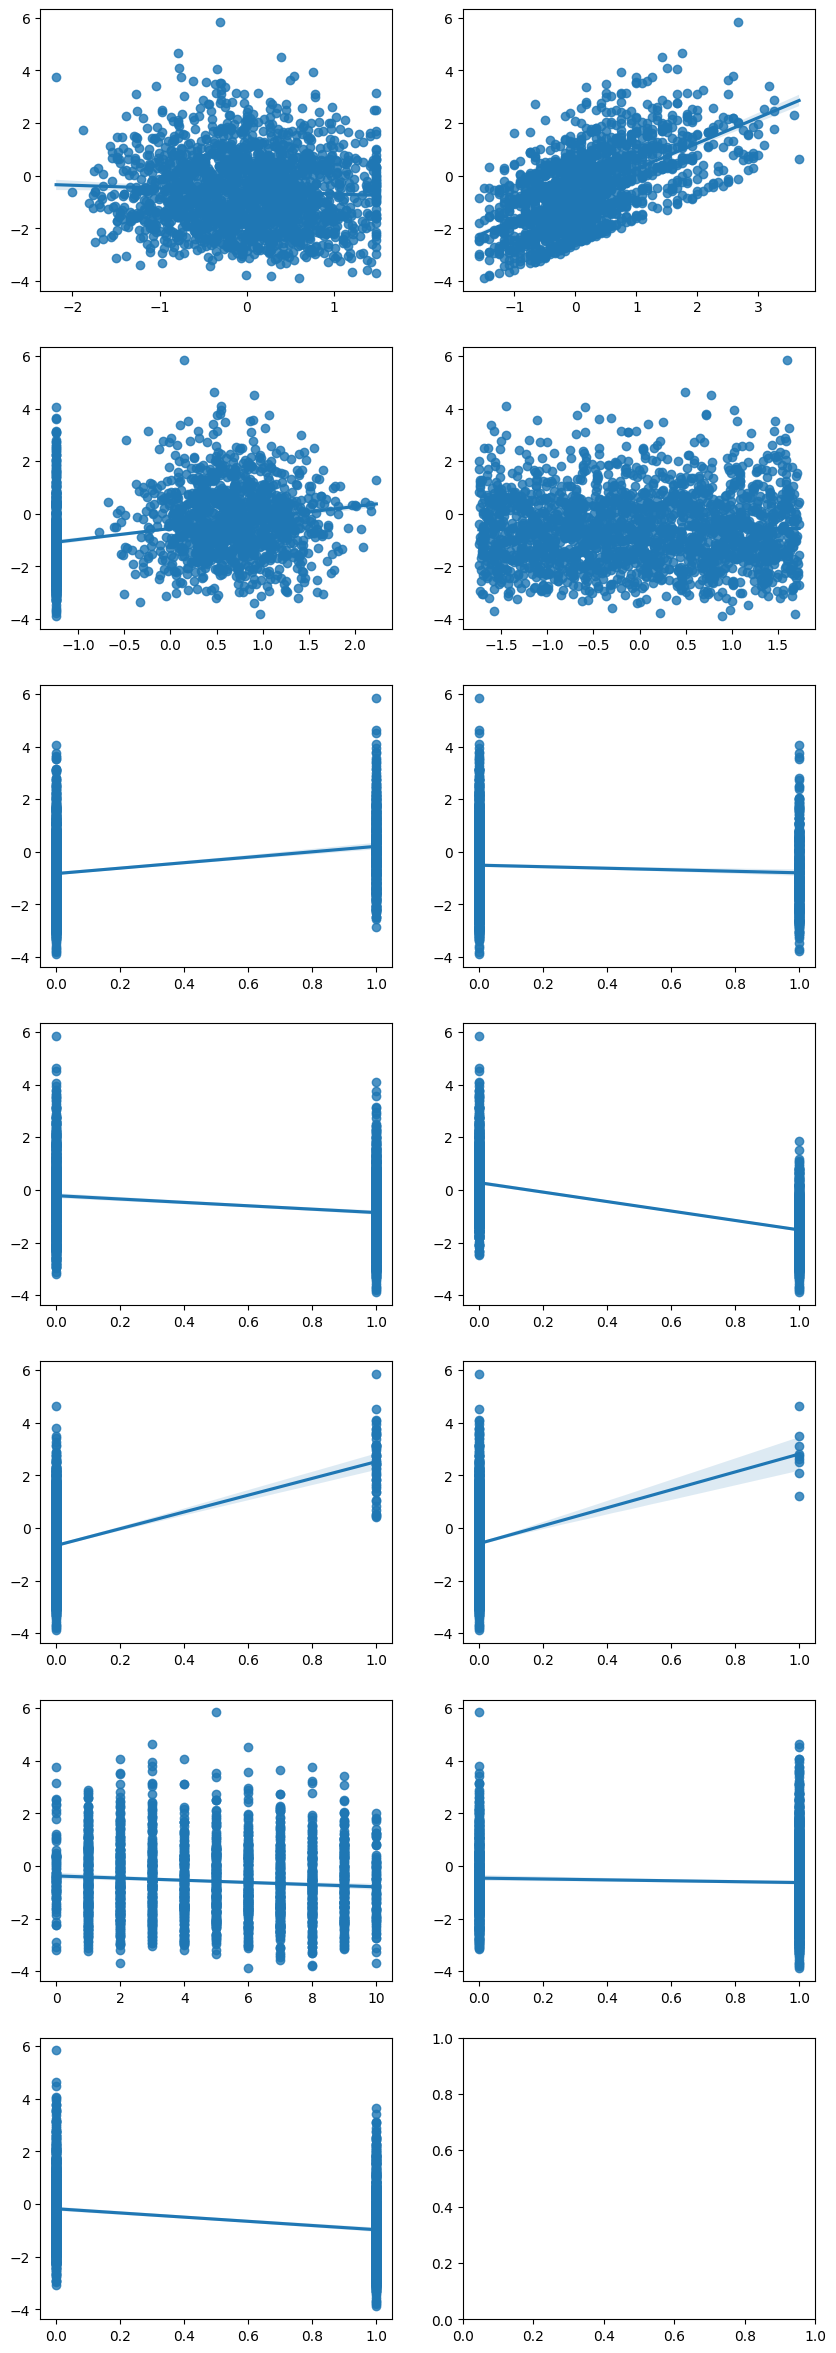

In [32]:
from sklearn.linear_model import LogisticRegression
import numpy as np

logit = np.log(lor.predict_proba(x_test_trf)[:,1] / (1 - lor.predict_proba(x_test_trf)[:,1]))
fig,ax=plt.subplots(7,2,figsize=(10,30))
ax=ax.flatten()
for i,col in enumerate(x1.columns):
    sns.regplot(x=x_test_trf[:,col], y=logit,ax=ax[i])

2. Decision Tree

In [33]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=6,max_features=0.75,class_weight="balanced")
dt.fit(x_train_trf,y_train)
print("Classification report train: \n",classification_report(y_train,dt.predict(x_train_trf)))

print("Classification report test: \n",classification_report(y_test,dt.predict(x_test_trf)))
print("F2 score: ",fbeta_score(y_test,dt.predict(x_test_trf),beta=2))
np.mean(cross_val_score(dt,x_train_trf,y_train,cv=5,scoring=f2_scorer))
print("ROC score: ",roc_auc_score(y_test,dt.predict_proba(x_test_trf)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,dt.predict_proba(x_test_trf)[:,1]))

Classification report train: 
               precision    recall  f1-score   support

           0       0.93      0.77      0.85      6346
           1       0.47      0.78      0.59      1654

    accuracy                           0.78      8000
   macro avg       0.70      0.78      0.72      8000
weighted avg       0.84      0.78      0.79      8000

Classification report test: 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      1617
           1       0.45      0.70      0.55       383

    accuracy                           0.78      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.83      0.78      0.79      2000

F2 score:  0.629976580796253
ROC score:  0.8231946469544381
Average Precision score:  0.5934568977494914


3.  Random Forest

In [34]:
rfc=RandomForestClassifier(class_weight="balanced",n_estimators=500,criterion="entropy",max_depth=4,max_features=0.75,max_samples=0.5)
rfc.fit(x_train_trf,y_train)
print("Classification report train: \n",classification_report(y_train,rfc.predict(x_train_trf)))

print("Classification report test: \n",classification_report(y_test,rfc.predict(x_test_trf)))
print("F2 score: ",fbeta_score(y_test,rfc.predict(x_test_trf),beta=2))
np.mean(cross_val_score(rfc,x_train_trf,y_train,cv=5,scoring=f2_scorer))
print("ROC score: ",roc_auc_score(y_test,dt.predict_proba(x_test_trf)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,dt.predict_proba(x_test_trf)[:,1]))

Classification report train: 
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      6346
           1       0.50      0.75      0.60      1654

    accuracy                           0.80      8000
   macro avg       0.71      0.78      0.73      8000
weighted avg       0.84      0.80      0.81      8000

Classification report test: 
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      1617
           1       0.48      0.69      0.56       383

    accuracy                           0.80      2000
   macro avg       0.70      0.75      0.71      2000
weighted avg       0.83      0.80      0.81      2000

F2 score:  0.6324868231911835
ROC score:  0.8231946469544381
Average Precision score:  0.5934568977494914


4. AdaBoost

In [ ]:
abc=AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion="entropy",max_depth=5,max_features=0.5,class_weight="balanced"),n_estimators=500,learning_rate=0.1,random_state=42)

abc.fit(x_train_trf,y_train)
print("Classification report train: \n",classification_report(y_train,abc.predict(x_train_trf)))

print("Classification report test: \n",classification_report(y_test,abc.predict(x_test_trf)))
print("Recall: ",recall_score(y_test,abc.predict(x_test_trf)))

print("F2 score: ",fbeta_score(y_test,abc.predict(x_test_trf),beta=2))
print("Cross val F2 score: ",np.mean(cross_val_score(abc,x_train_trf,y_train,cv=5,scoring=f2_scorer)))
print("ROC score: ",roc_auc_score(y_test,abc.predict_proba(x_test_trf)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,abc.predict_proba(x_test_trf)[:,1]))

Classification report train: 
               precision    recall  f1-score   support

           0       0.93      0.81      0.87      6346
           1       0.52      0.77      0.62      1654

    accuracy                           0.80      8000
   macro avg       0.73      0.79      0.74      8000
weighted avg       0.85      0.80      0.82      8000

Classification report test: 
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      1617
           1       0.48      0.70      0.57       383

    accuracy                           0.80      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.84      0.80      0.81      2000

Recall:  0.7049608355091384
F2 score:  0.6440839694656488
Cross val F2 score:  0.6762198670012358
ROC score:  0.8498395797910905
Average Precision score:  0.624179604780035


5. Balanced Random Forest

In [36]:

rfcb=BalancedRandomForestClassifier(n_estimators=100,criterion="gini",max_depth=7,max_features=0.6,max_samples=0.25,class_weight="balanced")
rfcb.fit(x_train_trf,y_train)
print("Classification report train: \n",classification_report(y_train,rfcb.predict(x_train_trf)))

print("Classification report test: \n",classification_report(y_test,rfcb.predict(x_test_trf)))
print("F2 score: ",fbeta_score(y_test,rfcb.predict(x_test_trf),beta=2))
np.mean(cross_val_score(rfcb,x_train_trf,y_train,cv=5,scoring=f2_scorer,n_jobs=-1))
print("ROC score: ",roc_auc_score(y_test,rfcb.predict_proba(x_test_trf)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,rfcb.predict_proba(x_test_trf)[:,1]))


Classification report train: 
               precision    recall  f1-score   support

           0       0.99      0.54      0.70      6346
           1       0.35      0.97      0.52      1654

    accuracy                           0.63      8000
   macro avg       0.67      0.75      0.61      8000
weighted avg       0.85      0.63      0.66      8000

Classification report test: 
               precision    recall  f1-score   support

           0       0.95      0.54      0.69      1617
           1       0.31      0.89      0.46       383

    accuracy                           0.61      2000
   macro avg       0.63      0.71      0.58      2000
weighted avg       0.83      0.61      0.65      2000

F2 score:  0.6495987772258311
ROC score:  0.8373046821386994
Average Precision score:  0.6138508219767876


In [37]:
from xgboost import XGBClassifier

6. XG Boost CLassifier.

In [38]:
#DecisionTreeClassifier(criterion="gini",max_depth=1,max_features=0.75,class_weight="balanced")

In [39]:
neg, pos = y_train.value_counts()[0], y_train.value_counts()[1]
scale = neg / pos


In [40]:
scale

np.float64(3.8367593712212815)

In [41]:
xgb=XGBClassifier(n_estimators=40,learning_rate=0.6,max_depth=2,scale_pos_weight=scale,objective="binary:logistic",reg_lambda=1,reg_alpha=0.5,subsample=0.75,colsample_bytree=0.75,random_state=42)
xgb.fit(x_train_trf,y_train)
print("Classification report train: \n",classification_report(y_train,xgb.predict(x_train_trf)))

print("Classification report test: \n",classification_report(y_test,xgb.predict(x_test_trf)))

print("F2 score: ",fbeta_score(y_test,xgb.predict(x_test_trf),beta=2))
print("Cross val F2 score: ",np.mean(cross_val_score(xgb,x_train_trf,y_train,cv=5,scoring=f2_scorer)))
print("ROC score: ",roc_auc_score(y_test,xgb.predict_proba(x_test_trf)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,xgb.predict_proba(x_test_trf)[:,1]))

Classification report train: 
               precision    recall  f1-score   support

           0       0.93      0.83      0.88      6346
           1       0.54      0.77      0.63      1654

    accuracy                           0.82      8000
   macro avg       0.74      0.80      0.76      8000
weighted avg       0.85      0.82      0.83      8000

Classification report test: 
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      1617
           1       0.49      0.70      0.58       383

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.72      2000
weighted avg       0.84      0.80      0.81      2000

F2 score:  0.6474820143884892
Cross val F2 score:  0.6875738747995228
ROC score:  0.8467022223083394
Average Precision score:  0.6574122249014857


In [42]:

from sklearn.svm import SVC
svc=SVC(C=1,kernel="rbf",class_weight="balanced",break_ties=True)
svc.fit(x_train_trf,y_train)
print("Classification report train: \n",classification_report(y_train,svc.predict(x_train_trf)))

print("Classification report test: \n",classification_report(y_test,svc.predict(x_test_trf)))
print("F2 score: ",fbeta_score(y_test,svc.predict(x_test_trf),beta=2))
np.mean(cross_val_score(svc,x_train_trf,y_train,cv=5,scoring=f2_scorer,n_jobs=-1))




Classification report train: 
               precision    recall  f1-score   support

           0       0.93      0.78      0.85      6346
           1       0.48      0.78      0.59      1654

    accuracy                           0.78      8000
   macro avg       0.71      0.78      0.72      8000
weighted avg       0.84      0.78      0.80      8000

Classification report test: 
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      1617
           1       0.45      0.74      0.56       383

    accuracy                           0.78      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.78      0.80      2000

F2 score:  0.6580166821130676


np.float64(0.6784208468916464)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=10,weights="distance",algorithm="auto",leaf_size=5,p=1,n_jobs=-1)
knc.fit(x_train_trf,y_train)
print("Classification report train: \n",classification_report(y_train,knc.predict(x_train_trf)))

print("Classification report test: \n",classification_report(y_test,knc.predict(x_test_trf)))
print("F2 score: ",fbeta_score(y_test,knc.predict(x_test_trf),beta=2))
np.mean(cross_val_score(knc,x_train_trf,y_train,cv=5,scoring=f2_scorer,n_jobs=-1))
print("ROC score: ",roc_auc_score(y_test,knc.predict_proba(x_test_trf)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,knc.predict_proba(x_test_trf)[:,1]))

Classification report train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6346
           1       1.00      1.00      1.00      1654

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Classification report test: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1617
           1       0.65      0.29      0.40       383

    accuracy                           0.83      2000
   macro avg       0.75      0.63      0.65      2000
weighted avg       0.81      0.83      0.81      2000

F2 score:  0.32314923619271446
ROC score:  0.7943949001390255
Average Precision score:  0.5277525934399708


In [48]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier([("bal_rf",rfcb),("abc",abc),("lor",lor)],voting="soft",weights=[0.7,0.5,0.3],n_jobs=-1,verbose=True)
vc.fit(x_train_trf,y_train)
print("Classification report train: \n",classification_report(y_train,vc.predict(x_train_trf)))
print("Classification report test: \n",classification_report(y_test,vc.predict(x_test_trf)))
print("F2 score: ",fbeta_score(y_test,vc.predict(x_test_trf),beta=2))
print("Cross value F2 Score: ",np.mean(cross_val_score(vc,x_train_trf,y_train,cv=5,scoring=f2_scorer,n_jobs=-1)))
print("ROC score: ",roc_auc_score(y_test,vc.predict_proba(x_test_trf)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,vc.predict_proba(x_test_trf)[:,1]))


Classification report train: 
               precision    recall  f1-score   support

           0       0.96      0.70      0.81      6346
           1       0.43      0.88      0.58      1654

    accuracy                           0.74      8000
   macro avg       0.70      0.79      0.70      8000
weighted avg       0.85      0.74      0.76      8000

Classification report test: 
               precision    recall  f1-score   support

           0       0.94      0.71      0.81      1617
           1       0.40      0.81      0.53       383

    accuracy                           0.73      2000
   macro avg       0.67      0.76      0.67      2000
weighted avg       0.84      0.73      0.76      2000

F2 score:  0.67157712305026
Cross value F2 Score:  0.6981133334688352
ROC score:  0.8480876328694308
Average Precision score:  0.6479898818508301


In [49]:
from sklearn.ensemble import StackingClassifier
stc=StackingClassifier(estimators=[("bal_rf",rfcb),("xgb",xgb),("dt",knc)],final_estimator=lor,cv=5,n_jobs=-1)
stc.fit(x_train_trf,y_train)
print("Classification report train: \n",classification_report(y_train,stc.predict(x_train_trf)))
print("Classification report test: \n",classification_report(y_test,stc.predict(x_test_trf)))
print("F2 score: ",fbeta_score(y_test,stc.predict(x_test_trf),beta=2))
print("Cross value F2 Score: ",np.mean(cross_val_score(stc,x_train_trf,y_train,cv=5,scoring=f2_scorer,n_jobs=-1)))
print("ROC score: ",roc_auc_score(y_test,stc.predict_proba(x_test_trf)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,stc.predict_proba(x_test_trf)[:,1]))


Classification report train: 
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      6346
           1       0.61      0.94      0.74      1654

    accuracy                           0.86      8000
   macro avg       0.80      0.89      0.82      8000
weighted avg       0.90      0.86      0.87      8000

Classification report test: 
               precision    recall  f1-score   support

           0       0.93      0.81      0.86      1617
           1       0.48      0.74      0.58       383

    accuracy                           0.80      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.80      0.81      2000

F2 score:  0.6641544983513895
Cross value F2 Score:  0.6987560624868445
ROC score:  0.8494649699424038
Average Precision score:  0.6498851571044674


Based on F2 score and Average Precision score, Voting classifier model is doing good predictions.

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
label=["Not Churned"," Churned"]

In [54]:
pd.DataFrame(confusion_matrix(y_test,vc.predict(x_test_trf)),index=[f"Actual {idx}" for idx in label ],columns=[f"Predicted {col}" for col in label])

,Predicted Not Churned,Predicted Churned
Actual Not Churned,1151,466
Actual Churned,73,310


In [ ]:
pd.DataFrame(confusion_matrix(y_test,stc.predict(x_test_trf)),index=[f"Actual {idx}" for idx in label ],columns=[f"Predicted {col}" for col in label])

,Predicted Not Churned,Predicted Churned
Actual Not Churned,1303,314
Actual Churned,103,280


# Smote
Applying Oversampling method for treating imbalanced data

In [ ]:
x_train_trf[1]

array([-0.36567164,  0.41666667,  1.30621864,  0.54659799,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        6.        ,  1.        ,  1.        ])

In [ ]:
from imblearn.over_sampling import SMOTENC
smote=SMOTENC(categorical_features=[4,5,6,7,8,9,11,12],random_state=42)
#x_train_smote,y_train_smote=smote.fit_resample(x_train_trf,y_train)


Now, our data is balanced.

In [ ]:
from imblearn.pipeline import Pipeline

In [ ]:
pipe_log=Pipeline([
    ("col_trf",col_trf),
    ("smote",smote),
    ("log",LogisticRegression(penalty="elasticnet",tol=0.0001,C=0.7,max_iter=1000,l1_ratio=0.5,solver="saga"))

])
pipe_log.fit(x_train,y_train)

print(classification_report(y_test,pipe_log.predict(x_test)))
print("F2 Score: ",fbeta_score(y_test,pipe_log.predict(x_test),beta=2))
print("F2 cross value score:",np.mean(cross_val_score(pipe_log,x_train,y_train,cv=5,scoring=f2_scorer,n_jobs=-1)))
print("ROC score: ",roc_auc_score(y_test,pipe_log.predict_proba(x_test)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,pipe_log.predict_proba(x_test)[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1617
           1       0.44      0.72      0.55       383

    accuracy                           0.77      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.83      0.77      0.79      2000

F2 Score:  0.6397774687065368
F2 cross value score: 0.6486993381615634
ROC score:  0.8155159524051729
Average Precision score:  0.5666264693562904


In [ ]:
pipe_dt=Pipeline([
    ("col_trf",col_trf),
    ("smote",smote),
    ("dt",DecisionTreeClassifier(criterion="gini",max_depth=5,max_features=0.75))
])
pipe_dt.fit(x_train,y_train)

print(classification_report(y_test,pipe_dt.predict(x_test)))
print("F2 score: ",fbeta_score(y_test,pipe_dt.predict(x_test),beta=2))
print("Cross value F2 score: ",np.mean(cross_val_score(pipe_dt,x_train,y_train,cv=5,scoring=f2_scorer,n_jobs=-1)))
print("ROC score: ",roc_auc_score(y_test,pipe_dt.predict_proba(x_test)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,pipe_dt.predict_proba(x_test)[:,1]))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1617
           1       0.43      0.66      0.52       383

    accuracy                           0.77      2000
   macro avg       0.67      0.73      0.69      2000
weighted avg       0.82      0.77      0.79      2000

F2 score:  0.5965909090909091
Cross value F2 score:  0.647418105281813
ROC score:  0.8111877554249805
Average Precision score:  0.534303227721808


In [ ]:
pipe_rf=Pipeline([
    ("col_trf",col_trf),
    ("smote",smote),
    ("rfc",RandomForestClassifier(n_estimators=500,criterion="gini",max_depth=4,max_features=0.5,max_samples=0.5,))
])
pipe_rf.fit(x_train,y_train)

print(classification_report(y_test,pipe_rf.predict(x_test)))
print("F2 Score",fbeta_score(y_test,pipe_rf.predict(x_test),beta=2))

print("F2 cross value",np.mean(cross_val_score(pipe_rf,x_train,y_train,cv=5,scoring=f2_scorer,n_jobs=-1)))
print("ROC score: ",roc_auc_score(y_test,pipe_rf.predict_proba(x_test)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,pipe_rf.predict_proba(x_test)[:,1]))


              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1617
           1       0.46      0.67      0.55       383

    accuracy                           0.79      2000
   macro avg       0.69      0.74      0.70      2000
weighted avg       0.83      0.79      0.80      2000

F2 Score 0.6163401815575729
F2 cross value 0.6543638950628652
ROC score:  0.8262803341132323
Average Precision score:  0.5914570011642163


In [ ]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=5,shuffle=True)

In [ ]:
pipe_abc=Pipeline([
    ("col_trf",col_trf),
    ("smote",smote),
    ("abc",AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion="gini",max_depth=1,max_features=0.8),n_estimators=100,learning_rate=1.5,random_state=42))
])
pipe_abc.fit(x_train,y_train)

print(classification_report(y_test,pipe_abc.predict(x_test)))
print("f2 score",fbeta_score(y_test,pipe_abc.predict(x_test),beta=2))
print("Cross val F2 score: ",np.mean(cross_val_score(pipe_abc,x_train,y_train,cv=cv,scoring=f2_scorer,n_jobs=-1))
)
print("ROC score: ",roc_auc_score(y_test,pipe_abc.predict_proba(x_test)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,pipe_abc.predict_proba(x_test)[:,1]))


              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1617
           1       0.47      0.72      0.57       383

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.81      2000

f2 score 0.6521739130434783
Cross val F2 score:  0.6519269622375823
ROC score:  0.8346339722691831
Average Precision score:  0.6163699026774098


In [ ]:
pipe_knc=Pipeline([
    ("col_trf",col_trf),
    ("smote",smote),
    ("abc",KNeighborsClassifier(n_neighbors=1,weights="distance",algorithm="auto",leaf_size=5,p=1,n_jobs=-1))
])
pipe_knc.fit(x_train,y_train)

print(classification_report(y_test,pipe_knc.predict(x_test)))
print("f2 score",fbeta_score(y_test,pipe_knc.predict(x_test),beta=2))

np.mean(cross_val_score(pipe_knc,x_train,y_train,cv=cv,scoring=f2_scorer,n_jobs=-1))
print("ROC score: ",roc_auc_score(y_test,pipe_knc.predict_proba(x_test)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,pipe_knc.predict_proba(x_test)[:,1]))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1617
           1       0.41      0.54      0.46       383

    accuracy                           0.76      2000
   macro avg       0.65      0.68      0.66      2000
weighted avg       0.79      0.76      0.77      2000

f2 score 0.5058939096267191
ROC score:  0.6767835546276426
Average Precision score:  0.30833919764598616


In [ ]:
pipe_knc=Pipeline([
    ("col_trf",col_trf),
    ("smote",smote),
    ("abc",XGBClassifier(n_estimators=100,learning_rate=0.2,max_depth=1,scale_pos_weights=1,objective="binary:logistic",reg_lambda=0.8,reg_alpha=0.8,subsample=0.5,colsample_bytree=0.75,random_state=42))
])
pipe_knc.fit(x_train,y_train)

print(classification_report(y_test,pipe_knc.predict(x_test)))
print("f2 score",fbeta_score(y_test,pipe_knc.predict(x_test),beta=2))

np.mean(cross_val_score(pipe_knc,x_train,y_train,cv=cv,scoring=f2_scorer,n_jobs=-1))
print("ROC score: ",roc_auc_score(y_test,pipe_knc.predict_proba(x_test)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,pipe_knc.predict_proba(x_test)[:,1]))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1617
           1       0.47      0.72      0.57       383

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.84      0.79      0.81      2000

f2 score 0.6510416666666666
ROC score:  0.8316354787820659
Average Precision score:  0.6099996552358173


In [ ]:
estimators=[("abc",AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion="entropy",max_depth=1,max_features=0.75), n_estimators=100,learning_rate=1.5)),
("rfc",RandomForestClassifier(n_estimators=500,criterion="gini",max_depth=4,max_features=0.5,max_samples=0.5)),
("lor",LogisticRegression(penalty="elasticnet",tol=0.0001,C=0.7,max_iter=1000,l1_ratio=0.5,solver="saga"))]

from sklearn.ensemble import VotingClassifier
pipe_voting=Pipeline([
    ("col_trf",col_trf),
    ("smote",smote),
    ("vc",VotingClassifier(estimators=estimators,voting="soft",weights=[0.5,0.5,0.5],n_jobs=-1))

])
VotingClassifier(estimators=[("bal_rf",rfcb),("abc",abc),("dt",dt),("lor",lor)],voting="soft",weights=[0.7,0.5,0.3,0.3],n_jobs=-1,verbose=True)

#vc=VotingClassifier([("bal_rf",rfcb),("abc",abc),("dt",dt),("lor",lor)],voting="soft",weights=[0.7,0.5,0.3,0.3],n_jobs=-1,verbose=True)
pipe_voting.fit(x_train,y_train)
print("Classification report train: \n",classification_report(y_train,pipe_voting.predict(x_train)))
print("Classification report test: \n",classification_report(y_test,pipe_voting.predict(x_test)))
print("F2 score: ",fbeta_score(y_test,pipe_voting.predict(x_test),beta=2))
print("Cross value F2 Score: ",np.mean(cross_val_score(pipe_voting,x_train,y_train,cv=5,scoring=f2_scorer,n_jobs=-1)))
print("ROC score: ",roc_auc_score(y_test,pipe_voting.predict_proba(x_test)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,pipe_voting.predict_proba(x_test)[:,1]))


Classification report train: 
               precision    recall  f1-score   support

           0       0.92      0.78      0.85      6346
           1       0.47      0.75      0.58      1654

    accuracy                           0.77      8000
   macro avg       0.70      0.76      0.71      8000
weighted avg       0.83      0.77      0.79      8000

Classification report test: 
               precision    recall  f1-score   support

           0       0.92      0.80      0.86      1617
           1       0.46      0.72      0.56       383

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.80      2000

F2 score:  0.6481048198408984
Cross value F2 Score:  0.6621053495643489
ROC score:  0.8291294680701616
Average Precision score:  0.6124277467469881


In [ ]:
pd.DataFrame(confusion_matrix(y_test,pipe_voting.predict(x_test)),index=[f"Actual {idx}" for idx in label ],columns=[f"Predicted {col}" for col in label])

,Predicted Not Churned,Predicted Churned
Actual Not Churned,1289,328
Actual Churned,106,277


Handling imbalance data using class weight hyperparameter giving better results than using smote.

# Final Model for prediction

In [55]:
lor=LogisticRegression(class_weight="balanced",penalty="elasticnet",tol=0.0001,C=0.1,max_iter=1000,l1_ratio=0.4,solver="saga")
abc=AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion="entropy",max_depth=5,max_features=0.5,class_weight="balanced"),n_estimators=500,learning_rate=0.1,random_state=42)
rfcb=BalancedRandomForestClassifier(n_estimators=100,criterion="gini",max_depth=7,max_features=0.6,max_samples=0.25,class_weight="balanced")

In [56]:
vc=VotingClassifier([("bal_rf",rfcb),("abc",abc),("lor",lor)],voting="soft",weights=[0.7,0.5,0.3],n_jobs=-1,verbose=True)


In [57]:
vc.fit(x_train_trf,y_train)
print("Classification report train: \n",classification_report(y_train,vc.predict(x_train_trf)))
print("Classification report test: \n",classification_report(y_test,vc.predict(x_test_trf)))
print("F2 score: ",fbeta_score(y_test,vc.predict(x_test_trf),beta=2))
print("Cross value F2 Score: ",np.mean(cross_val_score(vc,x_train_trf,y_train,cv=5,scoring=f2_scorer,n_jobs=-1)))
print("ROC score: ",roc_auc_score(y_test,vc.predict_proba(x_test_trf)[:,1]))
print("Average Precision score: ",average_precision_score(y_test,vc.predict_proba(x_test_trf)[:,1]))

Classification report train: 
               precision    recall  f1-score   support

           0       0.96      0.70      0.81      6346
           1       0.43      0.88      0.58      1654

    accuracy                           0.73      8000
   macro avg       0.69      0.79      0.69      8000
weighted avg       0.85      0.73      0.76      8000

Classification report test: 
               precision    recall  f1-score   support

           0       0.94      0.71      0.81      1617
           1       0.40      0.81      0.54       383

    accuracy                           0.73      2000
   macro avg       0.67      0.76      0.67      2000
weighted avg       0.84      0.73      0.76      2000

F2 score:  0.6731601731601732
Cross value F2 Score:  0.6976758718518236
ROC score:  0.8458528913582998
Average Precision score:  0.6421356942591285
